# **Music Recommendation System**

## **Problem Definition**

### **The Context:**

 - Why is this problem important to solve?

-> With the advent of technology, societies have become more efficient with their lives. At the same
time, however, individual human lives have also become more fast-paced and distracted, leaving
little time to explore artistic pursuits. Also, technology has made significant advancements in the
ability to coexist with art and general entertainment. It has in fact made it easier for humans with a
shortage of time to find and consume good content.


-> Almost every internet-based company's revenue relies on the time consumers spend on its platform.
These companies need to be able to figure out what kind of content is needed in order to increase
customer time spent and make their experience better. Therefore, one of the key challenges for
these companies is figuring out what kind of content their customers are most likely to consume.


-> Spotify is one such audio content provider with a huge market base across the world. With the
ever-increasing volume of songs becoming available on the Internet, searching for songs of interest
has become a tedious task in itself. However, Spotify has grown significantly in the market because
of its ability to recommend the ‘best’ next song to each and every customer based on a huge
preference database gathered over time - millions of customers and billions of songs. This is done
by using smart recommendation systems that can recommend songs based on users’ likes/dislikes.


### **The objective:**

 - What is the intended goal?

-> Build a recommendation system to propose the top 10 songs for a user based on the likelihood of
listening to those songs.


### **The key questions:**

- What are the key questions that need to be answered?

->which model performance is best to recommend songs that are relevant and relevant songs to be recommended 

->The performance of which model is better to decrease the loss and increase the profit for the service provider.

### **The problem formulation**:

- What is it that we are trying to solve using data science?

->Using the given dataset we will build various recommendation systems and compare their performance.

->The following are 5 recommendation system models:

**. Popularity based recommendation system**

**. Similarity-based collabrative filtering recommendation system**

**. Model-based collabrative filtering - Matrix Factorization**

**. Cluster based recommendation system**

**. Content based rcommendation system**


## **Data Dictionary**

The core data is the Taste Profile Subset released by the Echo Nest as part of the Million Song Dataset. There are two files in this dataset. The first file contains the details about the song id, titles, release, artist name, and the year of release. The second file contains the user id, song id, and the play count of users.

song_data

song_id - A unique id given to every song

title - Title of the song

Release - Name of the released album

Artist_name - Name of the artist 

year - Year of release

count_data

user _id - A unique id given to the user

song_id - A unique id given to the song

play_count - Number of times the song was played

## **Data Source**
http://millionsongdataset.com/

### **Importing Libraries and the Dataset**

In [1]:
# Mounting the drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:

# Used to ignore the warning given as output of the code
import warnings
warnings.filterwarnings('ignore')

# Basic libraries of python for numeric and dataframe computations
import numpy as np
import pandas as pd

# Import Matplotlib the Basic library for data visualization
import matplotlib.pyplot as plt


# Import seaborn - Slightly advanced library for data visualization
import seaborn as sns

# Import the required library to compute the cosine similarity between two vectors
from sklearn.metrics.pairwise import cosine_similarity

# Import defaultdict from collections A dictionary output that does not raise a key error
from collections import defaultdict

# Impoort mean_squared_error : a performance metrics in sklearn
from sklearn.metrics import mean_squared_error

### **Load the dataset**

In [3]:
# Importing the datasets

count_df=pd.read_csv('/content/drive/MyDrive/count_data.csv')
song_df=pd.read_csv('/content/drive/MyDrive/song_data.csv')

### **Understanding the data by viewing a few observations**

In [4]:
# See top 10 records of count_df data
count_df.head(10)

,Unnamed: 0,user_id,song_id,play_count
0,0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1
1,1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2
2,2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1
3,3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1
4,4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1
5,5,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODDNQT12A6D4F5F7E,5
6,6,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODXRTY12AB0180F3B,1
7,7,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOFGUAY12AB017B0A8,1
8,8,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOFRQTD12A81C233C0,1
9,9,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOHQWYZ12A6D4FA701,1


In [5]:
# See top 10 records of song_df data

song_df.head(10)


,song_id,title,release,artist_name,year
0,SOQMMHC12AB0180CB8,Silent Night,Monster Ballads X-Mas,Faster Pussy cat,2003
1,SOVFVAK12A8C1350D9,Tanssi vaan,Karkuteillä,Karkkiautomaatti,1995
2,SOGTUKN12AB017F4F1,No One Could Ever,Butter,Hudson Mohawke,2006
3,SOBNYVR12A8C13558C,Si Vos Querés,De Culo,Yerba Brava,2003
4,SOHSBXH12A8C13B0DF,Tangle Of Aspens,Rene Ablaze Presents Winter Sessions,Der Mystic,0
5,SOZVAPQ12A8C13B63C,"Symphony No. 1 G minor ""Sinfonie Serieuse""/All...",Berwald: Symphonies Nos. 1/2/3/4,David Montgomery,0
6,SOQVRHI12A6D4FB2D7,We Have Got Love,Strictly The Best Vol. 34,Sasha / Turbulence,0
7,SOEYRFT12AB018936C,2 Da Beat Ch'yall,Da Bomb,Kris Kross,1993
8,SOPMIYT12A6D4F851E,Goodbye,Danny Boy,Joseph Locke,0
9,SOJCFMH12A8C13B0C2,Mama_ mama can't you see ?,March to cadence with the US marines,The Sun Harbor's Chorus-Documentary Recordings,0


### **Let us check the data types and and missing values of each column**

In [6]:
# See the info of the count_df data
count_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000000 entries, 0 to 1999999
Data columns (total 4 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   Unnamed: 0  int64 
 1   user_id     object
 2   song_id     object
 3   play_count  int64 
dtypes: int64(2), object(2)
memory usage: 61.0+ MB


In [7]:
# See the info of the song_df data
song_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 5 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   song_id      1000000 non-null  object
 1   title        999985 non-null   object
 2   release      999995 non-null   object
 3   artist_name  1000000 non-null  object
 4   year         1000000 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 38.1+ MB


#### **Observations and Insights:**
**Count dataset**

->In the count dataset, there are 2000000 rows and 4 columns.

->The columns user_id and song_id are of object datatype and the column play_count has data type int64.

->The other column Unnamed also has data type int64, but we do'nt need that column for our analysis.Hence, we can drop the column Unnamed: 0.


**Song dataset**

->In the song data set there are 1000000 rows and 5 columns.

-> All the columns except year has object data type. and the year has int64 datatype.

In [8]:
# Left merge the count_df and song_df data on "song_id". Drop duplicates from song_df data simultaneously
df_merge=pd.merge(count_df,song_df.drop_duplicates(['song_id']),on='song_id', how='left')
# Drop the column 'Unnamed: 0'
df_merge=df_merge.drop(['Unnamed: 0'],axis=1)
## Name the obtained dataframe as "df"
df=df_merge
df

,user_id,song_id,play_count,title,release,artist_name,year
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1,The Cove,Thicker Than Water,Jack Johnson,0
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2,Entre Dos Aguas,Flamenco Para Niños,Paco De Lucia,1976
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1,Stronger,Graduation,Kanye West,2007
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1,Constellations,In Between Dreams,Jack Johnson,2005
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1,Learn To Fly,There Is Nothing Left To Lose,Foo Fighters,1999
...,...,...,...,...,...,...,...
1999995,d8bfd4ec88f0f3773a9e022e3c1a0f1d3b7b6a92,SOJEYPO12AAA8C6B0E,2,Ignorance (Album Version),Ignorance,Paramore,0
1999996,d8bfd4ec88f0f3773a9e022e3c1a0f1d3b7b6a92,SOJJYDE12AF729FC16,4,Two Is Better Than One,Love Drunk,Boys Like Girls featuring Taylor Swift,2009
1999997,d8bfd4ec88f0f3773a9e022e3c1a0f1d3b7b6a92,SOJKQSF12A6D4F5EE9,3,What I've Done (Album Version),What I've Done,Linkin Park,2007
1999998,d8bfd4ec88f0f3773a9e022e3c1a0f1d3b7b6a92,SOJUXGA12AC961885C,1,Up,My Worlds,Justin Bieber,2010


**Think About It:** As the user_id and song_id are encrypted. Can they be encoded to numeric features?

->Yes, the user_id and the song_id can be encoded to numeric features using LabelEncoder.

In [9]:
# Apply label encoding for "user_id" and "song_id"
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df["user_id"]=le.fit_transform(df["user_id"])
df["song_id"]=le.fit_transform(df["song_id"])


In [10]:
df.shape

(2000000, 7)

**Think About It:** As the data also contains users who have listened to very few songs and vice versa, is it required to filter the data so that it contains users who have listened to a good count of songs and vice versa?

-> Yes, We need to filter the data so that it contains users who have listened to a good count of songs and vice versa , this we help us to reduce the computing resources and processing time.It will also make it easy to train and evaluate the model efficiently.

A dataset of size 2000000 rows x 7 columns can be quite large and may require a lot of computing resources to process. This can lead to long processing times and can make it difficult to train and evaluate your model efficiently.
In order to address this issue, it may be necessary to trim down your dataset to a more manageable size.

In [11]:
# Get the column containing the users
users = df.user_id
# Create a dictionary from users to their number of songs
ratings_count = dict()
for user in users:
    # If we already have the user, just add 1 to their rating count
    if user in ratings_count:
        ratings_count[user] += 1
    # Otherwise, set their rating count to 1
    else:
        ratings_count[user] = 1    

In [12]:
# We want our users to have listened at least 90 songs
RATINGS_CUTOFF = 90
remove_users = []
for user, num_ratings in ratings_count.items():
    if num_ratings < RATINGS_CUTOFF:
        remove_users.append(user)
df = df.loc[~df.user_id.isin(remove_users)]

In [13]:
# Get the column containing the songs
songs = df.song_id
# Create a dictionary from songs to their number of users
ratings_count = dict()
for song in songs:
    # If we already have the song, just add 1 to their rating count
    if song in ratings_count:
        ratings_count[song] += 1
    # Otherwise, set their rating count to 1
    else:
        ratings_count[song] = 1    

In [14]:
# We want our song to be listened by atleast 120 users to be considred
# We want our song to be listened by atleast 120 users to be considred
RATINGS_CUTOFF = 120
remove_songs = []
for song, num_ratings in ratings_count.items():
    if num_ratings < RATINGS_CUTOFF:
        remove_songs.append(song)
df_final= df.loc[~df.song_id.isin(remove_songs)]

In [15]:
# Drop records with play_count more than(>) 5
df_final=df_final[df_final.play_count<=5]

In [16]:
# Check the shape of the data
df_final.shape

(117876, 7)

In [17]:
df_final.sample(10,random_state=1)

,user_id,song_id,play_count,title,release,artist_name,year
1648313,55663,1664,5,Horn Concerto No. 4 in E flat K495: II. Romanc...,Mozart - Eine kleine Nachtmusik,Barry Tuckwell/Academy of St Martin-in-the-Fie...,0
861077,7111,1248,2,American Idiot [feat. Green Day & The Cast Of ...,The Original Broadway Cast Recording 'American...,Green Day,0
1577224,39377,52,1,Halo,Halo,Beyoncé,2008
773384,45344,7131,1,Valerie,ESSENTIAL 08,Amy Winehouse,2007
823875,6779,7911,1,Heartbreak Warfare,Battle Studies,John Mayer,0
474433,11010,6572,1,Something About Us,Discovery,Daft Punk,2001
1632593,8279,52,1,Halo,Halo,Beyoncé,2008
310151,41572,5023,3,In My Place,A Rush Of Blood To The Head,Coldplay,2001
1411035,37043,3491,2,Bling (Confession Of A King),Sam's Town,The Killers,2006
343471,59163,916,4,Enter Sandman,Metallica,Metallica,1991


## **Exploratory Data Analysis**

### **Let's check the total number of unique users, songs, artists in the data**

Total number of unique user id

In [18]:
# Display total number of unique user_id
print('The total number of unique user_id are : ', df_final['user_id'].nunique())

The total number of unique user_id are :  3155


Total number of unique song id

In [19]:
# Display total number of unique song_id
print('The total number of unique song_id are : ',df_final['song_id'].nunique())

The total number of unique song_id are :  563


Total number of unique artists

In [20]:
# Display total number of unique artists
print('The total number of unique artists are : ',df_final['artist_name'].nunique())

The total number of unique artists are :  232


#### **Observations and Insights:__________**

->The total number of unique user_id are 3155

->The total number of unique song_id are 563

->The total number of unique artists are 232

### **Let's find out about the most interacted songs and interacted users**

Most interacted songs

In [21]:
df['song_id'].value_counts()

352     1002
2220     928
8582     838
5531     817
7416     754
        ... 
3212       2
7096       2
9616       1
132        1
6252       1
Name: song_id, Length: 9999, dtype: int64

In [22]:
df['song_id'].value_counts().sample(10,random_state=1)

2808    55
1792    25
1105    89
6207    62
3849    44
3332    20
752     12
7457    30
4153    66
6337    24
Name: song_id, dtype: int64

Most interacted users

In [23]:
df['user_id'].value_counts()

32542    711
75144    643
23297    556
10807    540
7834     533
        ... 
10536     90
63140     90
20927     90
67951     90
31296     90
Name: user_id, Length: 3156, dtype: int64

#### **Observations and Insights:_______**

->The song with song_id 352 has highest play_count of 1002 and the song with song_id 9616, 132 and 6252 has the lowest play_count as 1.

->The user with user_id 32542 has the highest play_count of 711 and the users with user_ids 10536,63140,20927,67951,31296 has the lowest play_count as 90

Songs played in a year

In [24]:
# Find out the number of songs played in a year
  # Hint: # Hint: Use groupby function on the 'year' column
count_songs=df_final.groupby('year').count()['play_count']
count=pd.DataFrame(count_songs)
count.drop(count.index[0], inplace=True)
count.head()

,play_count
year,
1969,238
1970,109
1971,133
1973,270
1974,583


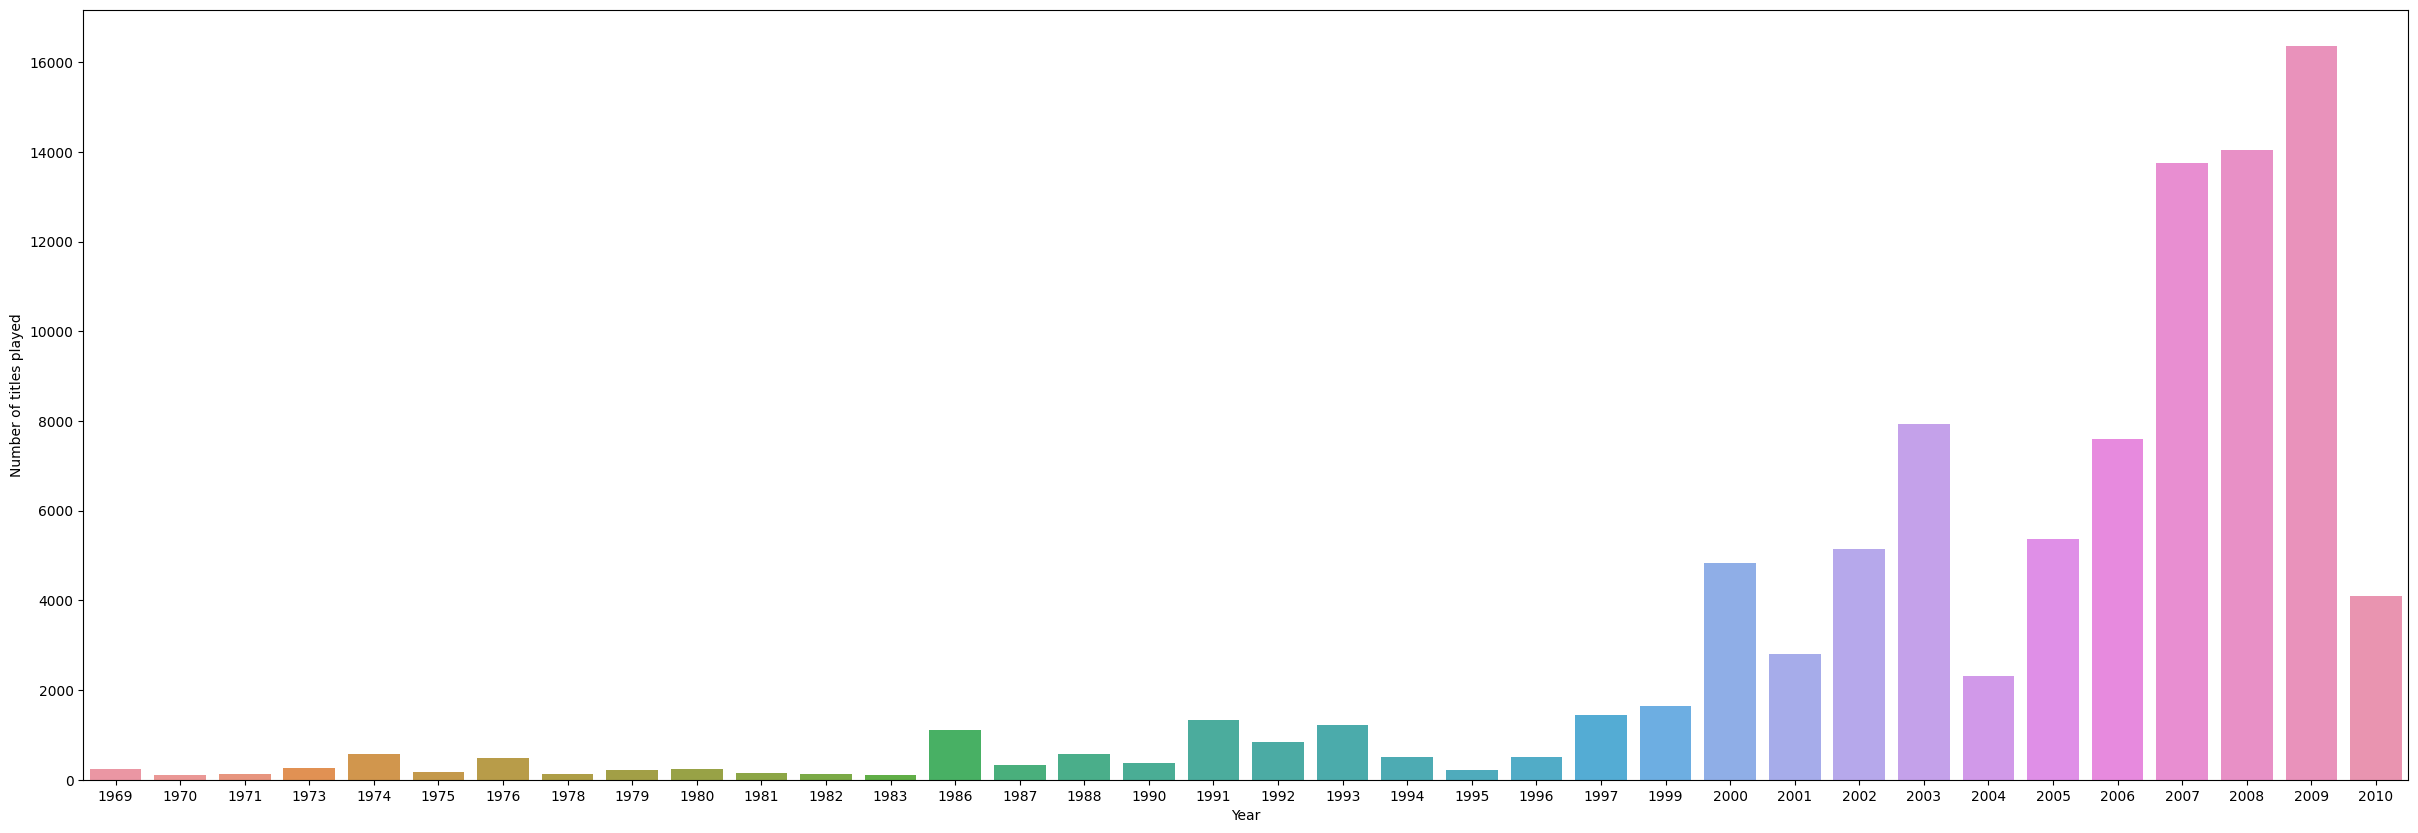

In [25]:
# Create a barplot plot with y label as "number of titles played" and x -axis year

# Set the figure size
plt.figure(figsize=(30,10))

sns.barplot(x = count.index,
            y='play_count',data=count, estimator=np.median)
# Set the x label of the plot
plt.xlabel('Year')

# Set the y label of the plot
plt.ylabel('Number of titles played')
# Show the plot
plt.show()

#### **Observations and Insights:** #

->We can observe that the play_count for the initial years is very low.

->From the year 1999 to 2000 ,the number of  play count of songs has been doubled.

->In the years 2001 and 2004, it can be observed the play count of songs has decreased.

->Again from the year 2006 to 2007 there is rapid icrease in the number of songs played.

->The highest number of songs are played in the year 2009. 

->We can observe that the number of songs played has decreased drastically in the year 2010 as compared to 2009.

-> Overall we can observe there are many fluctuations in the number of songs played over the years.

**Think About It:** What other insights can be drawn using exploratory data analysis?

-> Using the exploratory data analysis (EDA) we can check the summary statistics, missing values and many other plots which would help us to build more efficient models.

Now that we have explored the data, let's apply different algorithms to build recommendation systems.

**Note:** Use the shorter version of the data, i.e., the data after the cutoffs as used in Milestone 1.

## Building various models

### **Popularity-Based Recommendation Systems**

Let's take the count and sum of play counts of the songs and build the popularity recommendation systems based on the sum of play counts.

In [26]:
# Calculating average play_count
average_playcount=df_final.groupby('song_id').mean()['play_count']   # Hint: Use groupby function on the song_id column


# Calculating the frequency a song is played
play_freq= df_final.groupby('song_id').count()['play_count']      # Hint: Use groupby function on the song_id column


In [27]:
# Making a dataframe with the average_count and play_freq
final_play=pd.DataFrame({'avg_count':average_playcount, 'play_freq':play_freq})
# Let us see the first five records of the final_play dataset
final_play.head()

,avg_count,play_freq
song_id,,
21,1.622642,265
22,1.492424,132
52,1.729216,421
62,1.728070,114
93,1.452174,115


Now, let's create a function to find the top n songs for a recommendation based on the average play count of song. We can also add a threshold for a minimum number of playcounts for a song to be considered for recommendation.

In [28]:
# Build the function to find top n songs

def top_n_songs(final_play, n, min_interaction):
    
    # Finding songs with interactions greater than the minimum number of interactions
    recommendations = final_play[final_play['play_freq'] > min_interaction]
    
    # Sorting values with respect to the play_freq
    recommendations = recommendations.sort_values(by = 'play_freq', ascending = False)
    
    return recommendations.index[:n]

In [29]:
# Recommend top 10 songs using the function defined above

list(top_n_songs(final_play,10,100))

[8582, 352, 2220, 1118, 4152, 5531, 4448, 6189, 6293, 1334]

### **User User Similarity-Based Collaborative Filtering**

To build the user-user-similarity-based and subsequent models we will use the "surprise" library.

In [30]:
# Install the surprise package using pip. Uncomment and run the below code to do the same

!pip install surprise 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.0/772.0 KB 11.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp39-cp39-linux_x86_64.whl size=3195819 sha256=3cc9705262e08ab89b07080388b828cc595642c224e520567ac2334bc0db52bd
  Stored in directory: /root/.cache/pip/wheels/c6/3a/46/9b17b3512bdf283c6cb84f59929cdd5199d4e754d596d22784
Successfully built scikit-surprise


In [31]:
# Import necessary libraries

# To compute the accuracy of models

from surprise import accuracy

# This class is used to parse a file containing play_counts, data should be in structure - user; item; play_count
from surprise.reader import Reader

# Class for loading datasets
from surprise.dataset import Dataset

# For tuning model hyperparameters
from surprise.model_selection import GridSearchCV

# For splitting the data in train and test dataset

from surprise.model_selection import train_test_split

# For implementing similarity-based recommendation system
from surprise.prediction_algorithms.knns import KNNBasic

# For implementing matrix factorization based recommendation system
from surprise.prediction_algorithms.matrix_factorization import SVD

# For implementing KFold cross-validation
from surprise.model_selection import KFold

# For implementing clustering-based recommendation system
from surprise import CoClustering

# Before building the recommendation systems, let's go over some basic terminologies we are going to use:

Relevant item: An item (song in this case) that is actually played higher than the threshold play_count (here 1.5) is relevant, and an item that is actually rated lower than the threshold rating is a non-relevant item.

Recommended item: An item whose predicted play_count is higher than the threshold (here 1.5) is a recommended item, and an item whose predicted play_count is lower the threshold rating is a non-recommended item, i.e., it will not be recommended to the user.

False Negative (FN): It is the frequency of relevant items that are not recommended to the user. If the relevant items are not recommended to the user, then the user might not play the song/item. This would result in the loss of opportunity for the service provider, which they would like to minimize.

False Positive (FP): It is the frequency of recommended items that are actually not relevant. In this case, the recommendation system is not doing a good job of finding and recommending the relevant items to the user. This would result in loss of resources for the service provider, which they would also like to minimize.


Recall: It is the fraction of actually relevant items that are recommended to the user, i.e., if out of 10 relevant songs, 6 are recommended to the user, then recall is 0.60. Higher the value of recall, better is the model. It is one of the metrics to do the performance assessment of classification models.

Precision: It is the fraction of recommended items that are relevant actually, i.e., if out of 10 recommended items, 6 are found relevant by the user, then precision is 0.60. The higher the value of precision, better is the model. It is one of the metrics to do the performance assessment of classification models.



**While making a recommendation system, it becomes customary to look at the performance of the model. In terms of how many recommendations are relevant and vice-versa, below are some most used performance metrics used in the assessment of recommendation systems**

### **Precision@k, Recall@ k, and F1-score@k**

**Precision@k** - It is the **fraction of recommended items that are relevant in `top k` predictions**. The value of k is the number of recommendations to be provided to the user. One can choose a variable number of recommendations to be given to a unique user.  

**Recall@k** - It is the **fraction of relevant items that are recommended to the user in `top k` predictions**.

**F1-score@k** - It is the **harmonic mean of Precision@k and Recall@k**. When **precision@k and recall@k both seem to be important**, it is useful to use this metric because it is representative of both of them. 


### Some useful functions

Below is the function to calculate precision@k and recall@k, RMSE, and F1_Score@k to evaluate the model performance.

**Think About It:** Which metric should be used for this problem to compare different models?

In this case, precision and recall, both need to be optimized as the service provider would like to minimize both the losses discussed above. Hence, the correct performance measure is the F_1 score.

In [32]:
# The function to calulate the RMSE, precision@k, recall@k, and F_1 score
def precision_recall_at_k(model, k = 30, threshold = 1.5):
    """Return precision and recall at k metrics for each user"""

    # First map the predictions to each user.
    user_est_true = defaultdict(list)
    
    # Making predictions on the test data
    predictions=model.test(testset)
    
    for uid, _, true_r, est, _ in predictions:
        user_est_true[uid].append((est, true_r))

    precisions = dict()
    recalls = dict()
    for uid, user_ratings in user_est_true.items():

        # Sort user ratings by estimated value
        user_ratings.sort(key = lambda x : x[0], reverse = True)

        # Number of relevant items
        n_rel = sum((true_r >= threshold) for (_, true_r) in user_ratings)

        # Number of recommended items in top k
        n_rec_k = sum((est >= threshold) for (est, _) in user_ratings[ : k])

        # Number of relevant and recommended items in top k
        n_rel_and_rec_k = sum(((true_r >= threshold) and (est >= threshold))
                              for (est, true_r) in user_ratings[ : k])

        # Precision@K: Proportion of recommended items that are relevant
        # When n_rec_k is 0, Precision is undefined. We here set Precision to 0 when n_rec_k is 0

        precisions[uid] = n_rel_and_rec_k / n_rec_k if n_rec_k != 0 else 0

        # Recall@K: Proportion of relevant items that are recommended
        # When n_rel is 0, Recall is undefined. We here set Recall to 0 when n_rel is 0

        recalls[uid] = n_rel_and_rec_k / n_rel if n_rel != 0 else 0
    
    # Mean of all the predicted precisions are calculated
    precision = round((sum(prec for prec in precisions.values()) / len(precisions)), 3)

    # Mean of all the predicted recalls are calculated
    recall = round((sum(rec for rec in recalls.values()) / len(recalls)), 3)
    
    accuracy.rmse(predictions)

    # Command to print the overall precision
    print('Precision: ', precision)

    # Command to print the overall recall
    print('Recall: ', recall)
    
    # Formula to compute the F-1 score
    print('F_1 score: ', round((2 * precision * recall) / (precision + recall), 3))

**Think About It:** In the function precision_recall_at_k above the threshold value used is 1.5. How precision and recall are affected by changing the threshold? What is the intuition behind using the threshold value of 1.5? 

->The higher the threshold the higher the precision, but lower the recall. So if we increase the threshold value precision also increases and the recall decreses and vice versa.

-> Here we are using the threshold value of 1.5 so that we can optimize both precision and recall.

In [33]:
df_final.sample(5,random_state=1)

,user_id,song_id,play_count,title,release,artist_name,year
1648313,55663,1664,5,Horn Concerto No. 4 in E flat K495: II. Romanc...,Mozart - Eine kleine Nachtmusik,Barry Tuckwell/Academy of St Martin-in-the-Fie...,0
861077,7111,1248,2,American Idiot [feat. Green Day & The Cast Of ...,The Original Broadway Cast Recording 'American...,Green Day,0
1577224,39377,52,1,Halo,Halo,Beyoncé,2008
773384,45344,7131,1,Valerie,ESSENTIAL 08,Amy Winehouse,2007
823875,6779,7911,1,Heartbreak Warfare,Battle Studies,John Mayer,0


In [34]:
# Instantiating Reader scale with expected rating scale 
 #use rating scale (0, 5)

reader= Reader(rating_scale= (0,5))

# Loading the dataset
 # Take only "user_id","song_id", and "play_count"

data= Dataset.load_from_df(df_final[['user_id', 'song_id', 'play_count']], reader)

# Splitting the data into train and test dataset
 # Take test_size = 0.4, random_state = 42

trainset,testset=train_test_split(data,test_size=0.4,random_state=42)


**Think About It:** How changing the test size would change the results and outputs?

In [35]:
# Build the default user-user-similarity model

# Declaring the similarity options
sim_options={'name':'cosine',
             'user_based': True}

# KNN algorithm is used to find desired similar items
 # Use random_state = 1 

sim_user_user=KNNBasic(sim_options= sim_options,verbose=False,random_state=1)

# Train the algorithm on the trainset, and predict play_count for the testset

sim_user_user.fit(trainset)


# Let us compute precision@k, recall@k, and f_1 score with k = 30
 # Use sim_user_user model

precision_recall_at_k(sim_user_user)

RMSE: 1.0878
Precision:  0.396
Recall:  0.692
F_1 score:  0.504


**Observations and Insights:_________**

.We have calculated the RMSE to see how far the overall predicted ratings are from the actual ratings.

.Intution of Recall: We are getting a Recall of 0.692 which means out of all the relevant songs, 69% are recommended.

.Intution of Precision : We are getting a Precision of 0.39~0.40 which means out of all the recommended songs, 40% are relevant.

.Here F1 score of the base model is 0.504. It indicates that the percentage for  recommended songs were relevant and relevant songs were recommended is 50%. We will try to improve this later by using GridsearchCV by tunning different parameters of this algorithm.

**Now, let's predict the play_count for user with user_id = 55663 and song for song_id= 1664. Here,user has already interacted or played the song with song_id=1664 and the play_count for it is given as 5 which is denoted by the parameter r_ui**

In [36]:
# Predicting play_count for a sample user with a listened song
# Use any user id  and song_id
sim_user_user.predict(55663,1664,r_ui=5,verbose=True)

user: 55663      item: 1664       r_ui = 5.00   est = 1.85   {'actual_k': 40, 'was_impossible': False}


Prediction(uid=55663, iid=1664, r_ui=5, est=1.85, details={'actual_k': 40, 'was_impossible': False})

**The above output shows that the actual play_count for this user-item pair is 5, and the predicted Play_count is 1.85 by user-user-similarity-based baseline model, which is far away from actual prediction.**

**The output also contains "actual_k". It is value of k in KNN that is used while training the model. The default value is 40.**

**Below is the list of user who have played the song with song_id=22**

In [37]:
df_final[df_final.song_id ==22].user_id.unique()

array([46525, 39814, 19193, 40245, 18623, 73748, 51011, 31692, 48399,
       19822, 50013,  4165, 43041, 72117, 42943, 45507, 51242, 25354,
       49157, 52796, 63487, 17321, 11664, 19203,  6167, 25409, 64613,
       32961, 37526, 33422,  5221,   905, 11536, 71041, 23266, 39813,
       14714, 32663, 37049, 31618, 43268, 16883,  1041, 56248, 21141,
       23790, 62876, 28208, 76161, 54194, 28914, 20132, 50017, 49142,
        1984, 27621, 61756, 71183, 37758, 12776, 27898, 14310,  1468,
       70059, 34800,  8606, 23532, 29270, 23806, 38538, 58140, 30088,
       19182,  1206, 56097,  9786, 12929, 21500, 15435,   457, 24730,
       40292, 68932, 65431, 63473, 24054,   812, 62126, 25535, 61472,
       52105, 58887, 48356,  1799, 21217, 37850, 20904, 69003, 23421,
       20619, 60623, 21701, 17819, 18978, 31154,  6240, 75144, 69531,
       27727, 61007,    84, 14035,  6792, 40451, 42279,  8081, 53934,
       10763, 34371, 40540, 53002, 72644, 10716, 13576, 31754, 22979,
       12355, 18109,

Below, **We are predicting the play_count with same user_id=55663 ,     but for a song with which this user has not interacted yet i.e., song_id= :22.**

In [38]:
# Predicting play_count for a sample user with a song not-listened by the user
 #predict play_count for any sample user

sim_user_user.predict(55663,22, r_ui= None, verbose=True)

user: 55663      item: 22         r_ui = None   est = 1.47   {'actual_k': 40, 'was_impossible': False}


Prediction(uid=55663, iid=22, r_ui=None, est=1.4694863336306538, details={'actual_k': 40, 'was_impossible': False})

**Observations and Insights:**

**The predicted play_count for this user is 1.47 based on this user-user-similarity based baseline model.**

# Improving similarity-based recommendation system by tunning its hyperparameters.

Below we will be tunning the hypermeters for the algorithms.Let's try to understand some of the hyperparameters of the KNNBasic algorithm:KNNBasic

- **k** (int) – The (max) number of neighbors to take into account for aggregation. Default is 40.
- **min_k** (int) – The minimum number of neighbors to take into account for aggregation. If there are not enough neighbors, the prediction is set to the global mean of all ratings. Default is 1.
- **sim_options** (dict) – A dictionary of options for the similarity measure. And there are four similarity measures available in surprise - 
    - cosine
    - msd (default)
    - Pearson
    - Pearson baseline


**Note:** GridSearchCV does not accept the metrics recall@k, precision@k, or F1 Score@k. As a result, we'll tune the model using RMSE.


Now, let's try to tune the model and see if we can improve the model performance.

In [39]:
# Setting up parameter grid to tune the hyperparameters
param_grid={'k':[20,30,40], 'min_k':[3,6,9],
            'sim_options':{'name':['msd','cosine'],
                           'user_based':[True]}}

# Performing 3-fold cross-validation to tune the hyperparameters
gs=GridSearchCV(KNNBasic,param_grid, measures=['rmse'], cv=3 ,n_jobs=-1)

# Fitting the data

 # Use entire data for GridSearch

gs.fit(data)

# Best RMSE score

print(gs.best_score['rmse'])

# Combination of parameters that gave the best RMSE score

print(gs.best_params['rmse'])


1.0598267398116645
{'k': 40, 'min_k': 9, 'sim_options': {'name': 'msd', 'user_based': True}}


Once the gridSearch is complete we can get the optimal values for each of those hyperparameters as shown above.

Now, let's build the **final model by using the optimal values of the hyperparameters**, which we received by using the **grid search cross-validation**.

In [40]:
# Train the best model found in above gridsearch
#Using the optimal similarity measures for user-user collabrative filtering

sim_options= {'name':'msd',
              'user_based':True}

#Creating an instance of KNNBasic with optimal hyperparameter values

sim_user_user_optimized= KNNBasic(sim_options=sim_options, k=40, min_k= 9, verbose=True, random_state=1)

#Training the algorithm on the train set

sim_user_user_optimized.fit(trainset)

#Let us compute precision@k, recall@k and F1_score with k=30
precision_recall_at_k(sim_user_user_optimized)

Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 1.0620
Precision:  0.414
Recall:  0.611
F_1 score:  0.494


**Observations and Insights:_________**

-> We can observe that after tuning hyperparameters, **F_1 score of the tuned model is 0.49, it has slightly reduced as compare to the baseline model**.

 **The precision is improved slightly and the RMSE is decreased slightly.**
 
 **Hence, we can observe that the model performance has not improved much after hyperparameter tuning.**

In [41]:
# Predict the play count for a user who has listened to the song. Take user_id 6958, song_id 1671 and r_ui = 2
sim_user_user_optimized.predict(6958, 1671,r_ui=2, verbose=True )

user: 6958       item: 1671       r_ui = 2.00   est = 1.52   {'actual_k': 40, 'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=1.5210405508798759, details={'actual_k': 40, 'was_impossible': False})

In [42]:
# Predict the play count for a song that is not listened to by the user (with user_id 6958)
sim_user_user_optimized.predict(6958,22,r_ui=None, verbose=True)

user: 6958       item: 22         r_ui = None   est = 1.44   {'actual_k': 40, 'was_impossible': False}


Prediction(uid=6958, iid=22, r_ui=None, est=1.43577429187421, details={'actual_k': 40, 'was_impossible': False})

**Observations and Insights:______________**

->If we compare the actual play_count and predicted play_count for user who **listened to the song**,we can say that the predicted play_count by the tuned model is much closer compared to baseline model.

->If we compare the play_count for user who has **not listened to the song** , we can say predicted play_count by tuned and baseline model is almost similar.

**Think About It:** Along with making predictions on listened and unknown songs can we get 5 nearest neighbors (most similar) to a certain song?

->Yes, we can get 5 nearest neighbors to a certain songs using KNNBasic algorithm.

# Identifing  similar Users to a giver user(k nearest neighbors).

We can  find out **similar users to a given user** or its **nearest neighbors** based on this KNNBasic algorithm. Below, we are finding the 5 most similar users to the first user in the list with internal id 0, based on the `msd` distance metric.

In [43]:
# Use inner id 0

sim_user_user_optimized.get_neighbors(0,5)


[31, 82, 90, 116, 125]

## **Implementing the recommendation algorithm based on optimized KNNBasic model**

Below we will be implementing a function where the input parameters are:

- data: A **song** dataset
- user_id: A user-id **against which we want the recommendations**
- top_n: The **number of songs we want to recommend**
- algo: The algorithm we want to use **for predicting the play_count**
- The output of the function is a **set of top_n items** recommended for the given user_id based on the given algorithm

In [44]:
def get_recommendations(data, user_id, top_n, algo):
    
    # Creating an empty list to store the recommended song ids
    recommendations = []
    
    # Creating an user item interactions matrix
    user_item_interactions_matrix = data.pivot(index = 'user_id', columns = 'song_id', values = 'play_count')
    
    # Extracting those song ids which the user ID has not interacted yet
    non_interacted_songs = user_item_interactions_matrix.loc[user_id][user_item_interactions_matrix.loc[user_id].isnull()].index.tolist()
    
    # Looping through each of the song ids which user ID has not interacted yet
    for item_id in non_interacted_songs:
        
        # Predicting the play_count for those non interacted song ids by this user
        est = algo.predict(user_id, item_id).est
        
        # Appending the predicted play_count
        recommendations.append((item_id, est))

    # Sorting the predicted play_count in descending order
    recommendations.sort(key = lambda x: x[1], reverse = True)

    # Returing top n highest predicted songs for this user
    return recommendations[:top_n]

In [45]:
 # Make top 5 recommendations for any user_id with a similarity-based recommendation engine
recommendations = get_recommendations(df_final, 6958, 5, sim_user_user_optimized)

In [46]:
# Building the dataframe for above recommendations with columns "song_id" and "predicted_play_count"
pd.DataFrame(recommendations,columns=['song_id','predicted_play_count'])


,song_id,predicted_play_count
0,7224,2.935235
1,6450,2.668720
2,8324,2.467205
3,6448,2.386082
4,4831,2.348859


**Observations and Insights:**

->We can observe that the predicted_play_count for all the song_ids are closer.Hence we can say that the optimized KNNBasic model has performed well.  

### Correcting the play_counts and Ranking the above songs

While comparing the play_count of two songs, it is not only the play_count that describe the likelihood of the user to that song. Along with the play_count, the number of users who have played that song also becomes important to consider. Due to this, we have calculated the "corrected_play_count" for each song. Commonly higher the "play_count" of a song more it is liked by users. To interpret the above concept, a song rated 4 with play_count 3 is less liked in comparison to a song rated 3 with a play_count of 50. It has been empirically found that the likelihood of the product is directly proportional to the inverse of the square root of the play_count of the song.

In [47]:
def ranking_songs(recommendations, final_play):
  # Sort the songs based on play counts
 ranked_songs = final_play.loc[[items[0] for items in recommendations]].sort_values('play_freq', ascending = False)[['play_freq']].reset_index()

  # Merge with the recommended songs to get predicted play_count
 ranked_songs = ranked_songs.merge(pd.DataFrame(recommendations, columns = ['song_id', 'predicted_rating']), on = 'song_id', how = 'inner')

  # Rank the songs based on corrected play_counts
 ranked_songs['corrected_rating'] = ranked_songs['predicted_rating'] - 1 / np.sqrt(ranked_songs['play_freq'])

  # Sort the songs based on corrected play_counts
 ranked_songs=ranked_songs.sort_values('corrected_rating', ascending= False)
 return ranked_songs

**Think About It:** In the above function to correct the predicted play_count a quantity 1/np.sqrt(n) is subtracted. What is the intuition behind it? Is it also possible to add this quantity instead of subtracting?

In [48]:
# Applying the ranking_songs function on the final_play data
ranking_songs(recommendations, final_play)

,song_id,play_freq,predicted_rating,corrected_rating
1,7224,107,2.935235,2.838562
2,6450,102,2.668720,2.569705
4,8324,96,2.467205,2.365143
0,6448,109,2.386082,2.290300
3,4831,97,2.348859,2.247324


**Observations and Insights:**

->There is not much difference between predicted_rating and corrected_rating.

### Item Item Similarity-based collaborative filtering recommendation systems 

We have seen user-user similarity-based collaborative filtering. Now, let us look into similarity-based collaborative filtering where similarity is computed between items.

In [49]:
# Apply the item-item similarity collaborative filtering model with random_state = 1 and evaluate the model performance
# Declaring the similarity options
sim_options={'name':'cosine',
             'user_based': False}

# KNN algorithm is used to find desired similar items
 # Use random_state = 1 

sim_item_item=KNNBasic(sim_options= sim_options,verbose=False,random_state=1)

# Train the algorithm on the trainset, and predict play_count for the testset

sim_item_item.fit(trainset)


# Let us compute precision@k, recall@k, and f_1 score with k = 30
 # Use sim_user_user model

precision_recall_at_k(sim_item_item)

RMSE: 1.0394
Precision:  0.307
Recall:  0.562
F_1 score:  0.397


**Observations and Insights:**

->F_1 score of the baseline model is is~0.40. We will try to improve this later by tunning different hyperparameters of this algorithm using GridSearchCV.

In [50]:
# Predicting play count for a sample user_id 6958 and song (with song_id 1671) heard by the user
sim_item_item.predict(6958, 1671, verbose=True )

user: 6958       item: 1671       r_ui = None   est = 1.36   {'actual_k': 20, 'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=None, est=1.3614157231762556, details={'actual_k': 20, 'was_impossible': False})

In [51]:
df_final[df_final.song_id ==1671].user_id.unique()

array([ 6958, 45386, 22749, 51415, 74334, 15700, 18349, 33280, 41799,
       54866, 23516, 21117, 63702, 27240, 14538, 69334, 44790, 45349,
       70987, 53145, 11453, 49747,  6141, 20797, 30305, 55566, 57374,
        1035, 52134, 23705, 60129, 58757, 11010, 18409, 28007, 59672,
        7670, 20809, 25351, 15644, 21045, 68061, 35160, 55323, 31451,
        4848, 23790, 41878, 69900, 53691, 43177, 52662, 72448, 60644,
       60518, 40802, 34410, 17434, 56574, 62989, 15634, 71179, 50849,
       63669, 71481, 75934, 38654, 61513, 29038, 59307, 42216, 66345,
       25298,  9975, 52400, 15984, 25051,  2396, 71060,  1604, 33403,
       60008, 39281, 23777, 61358, 48538, 35101, 44726, 23099, 60923,
       70967, 23148, 34385, 69297, 69722, 17793,  1602, 37727, 61794,
       48175, 29786, 72397, 60215, 45152, 45401, 44865, 10267, 43539,
       16915, 72912, 67874, 29527, 64985, 48845, 17932, 48976, 29040,
       40358, 16076, 62379, 11799, 10218, 17050,  9193, 19263, 52192,
       23856, 45335,

In [52]:
# Predict the play count for a user that has not listened to the song (with song_id 1671)

# we are using the user_id: 46525 which is not interacted by song_id 1671.

sim_item_item.predict(46525,1671, verbose=True )

user: 46525      item: 1671       r_ui = None   est = 1.45   {'actual_k': 29, 'was_impossible': False}


Prediction(uid=46525, iid=1671, r_ui=None, est=1.4539739960355116, details={'actual_k': 29, 'was_impossible': False})

**Observations and Insights:**

->The predicted rating for the songs **listened** is 1.36 and for the songs which are **not listened** is 1.45. 

# Improving similarity-based recommendation system by tuning its hyperparameter

Below, we will be tuning hyperparameters of the KNNBasic algorithm

In [53]:
# Apply grid search for enhancing model performance

# Setting up parameter grid to tune the hyperparameters

param_grid={'k':[10,20,30],'min_k': [3,6,9,],
            'sim_options': {'name': ['msd', 'cosine'],
                              'user_based': [False]} }


# Performing 3-fold cross-validation to tune the hyperparameters
gs = GridSearchCV(KNNBasic, param_grid, measures = ['rmse'], cv = 3, n_jobs = -1)

# Fitting the data
gs.fit(data)

# Find the best RMSE score
print(gs.best_score['rmse'])
# Extract the combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])

1.0331673607255816
{'k': 30, 'min_k': 6, 'sim_options': {'name': 'cosine', 'user_based': False}}


**Think About It:** How do the parameters affect the performance of the model? Can we improve the performance of the model further? Check the list of hyperparameters [here](https://surprise.readthedocs.io/en/stable/knn_inspired.html).

 ->Yes, we can improve the performance of the model.

In [54]:
# Apply the best modle found in the grid search
sim_options={'name':'cosine',
             'user_based': False}

# KNN algorithm is used to find desired similar items
 # Use random_state = 1 

sim_item_item_optimized=KNNBasic(sim_options= sim_options,k=30, min_k= 6, verbose=False,random_state=1)

# Train the algorithm on the trainset, and predict play_count for the testset

sim_item_item_optimized.fit(trainset)


# Let us compute precision@k, recall@k, and f_1 score with k = 30
 # Use sim_user_user model

precision_recall_at_k(sim_item_item_optimized)

RMSE: 1.0398
Precision:  0.325
Recall:  0.587
F_1 score:  0.418


**Observations and Insights:**

-> F_1 score of optimized item-item similarity-based model has decreased as compared to user-user similarity-based model.

-> we can observe that the model performance has not improved much after tuning hyperparameters.

In [55]:
# Predict the play_count by a user(user_id 6958) for the song (song_id 1671)
sim_item_item_optimized.predict(6958,1671,r_ui=2,verbose=True )

user: 6958       item: 1671       r_ui = 2.00   est = 1.36   {'actual_k': 20, 'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=1.3614157231762556, details={'actual_k': 20, 'was_impossible': False})

In [56]:
# Predicting play count for a sample user_id 6958 with song_id 3232 which is not heard by the user
sim_item_item_optimized.predict(6958, 3232,r_ui=None, verbose=True)

user: 6958       item: 3232       r_ui = None   est = 1.38   {'actual_k': 20, 'was_impossible': False}


Prediction(uid=6958, iid=3232, r_ui=None, est=1.377602711737415, details={'actual_k': 20, 'was_impossible': False})

**Observations and Insights:**

-> Actual play count for  **songs heard** is 2 , which is much closer to the predicted play count.

 -> The predicted play count for the **song not heard** is 1.38.

### **Identifying similar items to a given item (nearest neighbors)**

We can also find out similar items to a given item or its nearest neighbors based on this KNNBasic algorithm. Below we are finding the 5 most similar items to the item with internal id 0 based on the distance metric.msd


In [57]:
# Find five most similar items to the item with inner id 0
sim_item_item_optimized.get_neighbors(0,k=5)

[3, 10, 11, 24, 30]

In [58]:
# Making top 5 recommendations for any user_id  with item_item_similarity-based recommendation engine
# Here we are using the user_id 6958 for making top 5 recommendations

recommendations=get_recommendations(df_final,6958, 5, sim_item_item_optimized)

In [59]:
# Building the dataframe for above recommendations with columns "song_id" and "predicted_play_count"
pd.DataFrame(recommendations,columns=['song_id','predicted_play_count'])

,song_id,predicted_play_count
0,2842,1.650010
1,7921,1.542349
2,1767,1.540675
3,4631,1.539257
4,5417,1.538866


In [60]:
# Applying the ranking_songs function

ranking_songs(recommendations, final_play)


,song_id,play_freq,predicted_rating,corrected_rating
0,2842,232,1.650010,1.584357
1,7921,220,1.542349,1.474929
2,5417,135,1.538866,1.452800
3,4631,120,1.539257,1.447970
4,1767,112,1.540675,1.446184


**Observations and Insights**

->The predicted rating ranges between 1.54 to 1.65 where as the corrected rating ranges between 1.44 to 1.58.

### Model Based Collaborative Filtering - Matrix Factorization

Model-based Collaborative Filtering is a **personalized recommendation system**, the recommendations are based on the past behavior of the user and it is not dependent on any additional information. We use **latent features** to find recommendations for each user.

In [61]:
# Build baseline model using svd

# Using SVD matrix factorization
svd = SVD(random_state=1)

# Training the algorithm on the train set
svd.fit(trainset)

# Use the function precision_recall_at_k to compute precision@k, recall@k, F1-Score, and RMSE
precision_recall_at_k(svd)

RMSE: 1.0252
Precision:  0.41
Recall:  0.633
F_1 score:  0.498


-> **F_1score of svd baseline model is same as user-user-similarity-based optimized model but the RMSE has gone down.**





In [62]:
# Making prediction for user (with user_id 6958) to song (with song_id 1671), take r_ui = 2
svd.predict(6958,1671,r_ui=2,verbose=True)

user: 6958       item: 1671       r_ui = 2.00   est = 1.27   {'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=1.267473397214638, details={'was_impossible': False})

In [63]:
# Making a prediction for the user who has not listened to the song (song_id 3232)
svd.predict(6958,3232,r_ui=None, verbose=True)

user: 6958       item: 3232       r_ui = None   est = 1.56   {'was_impossible': False}


Prediction(uid=6958, iid=3232, r_ui=None, est=1.5561675084403663, details={'was_impossible': False})

#### Improving matrix factorization based recommendation system by tuning its hyperparameters

There are many hyperparameters to tune this algorithm.

Below we will be tuning only three hyperparameters:

n_epochs: The number of iterations of the SGD algorithm.
lr_all: The learning rate for all parameters.
reg_all: The regularization term for all parameters.

In [64]:
# Set the parameter space to tune
param_grid = {'n_epochs': [10, 20, 30], 'lr_all': [0.001, 0.005, 0.01],
              'reg_all': [0.2, 0.4, 0.6]}

# Performe 3-fold grid-search cross-validation
gs_=GridSearchCV(SVD,param_grid, measures=['rmse'],cv=3, n_jobs=-1)

# Fitting data
gs_.fit(data)
# Best RMSE score
print(gs_.best_score['rmse'])
# Combination of parameters that gave the best RMSE score
print(gs_.best_params['rmse'])

1.0131747535866715
{'n_epochs': 30, 'lr_all': 0.01, 'reg_all': 0.2}


**Think About It**: How do the parameters affect the performance of the model? Can we improve the performance of the model further? Check the available hyperparameters [here](https://surprise.readthedocs.io/en/stable/matrix_factorization.html).

**Now we will build the final model by using the tuned values of the hyperparameter, which we received using GridSearchCV above.**

In [65]:
# Building the optimized SVD model using optimal hyperparameters
# Build the optimized SVD model using optimal hyperparameter search
svd_optimized = SVD(n_epochs=30,lr_all=0.01, reg_all= 0.2, random_state=1)

# Train the algorithm on the train set
svd_optimized=svd_optimized.fit(trainset)

# Use the function precision_recall_at_k to compute precision@k, recall@k, F1-Score, and RMSE
precision_recall_at_k(svd_optimized)

RMSE: 1.0141
Precision:  0.415
Recall:  0.635
F_1 score:  0.502


**Observations and Insights:**

->We can observe that the F_1 score of the model is 50.02 and RMSE is 1.01 which is better compare to all other models.

->Hence we can say the performance of the model has improved after tuning hyperparameters.

In [66]:
# Using svd_algo_optimized model to recommend for userId 6958 and song_id 1671
svd_optimized.predict(6958,1671,r_ui=2, verbose=True)

user: 6958       item: 1671       r_ui = 2.00   est = 1.34   {'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=1.3432395286125098, details={'was_impossible': False})

In [67]:
# Using svd_algo_optimized model to recommend for userId 6958 and song_id 3232 with unknown baseline rating
svd_optimized.predict(6958,3232,r_ui=None, verbose=True)

user: 6958       item: 3232       r_ui = None   est = 1.44   {'was_impossible': False}


Prediction(uid=6958, iid=3232, r_ui=None, est=1.4425484461176483, details={'was_impossible': False})

**Observations and Insights:** 

-> **The model prediction of the svd_optimized model is better compare to the svd baseline model.** 

In [68]:
# Getting top 5 recommendations for user_id 6958 using "svd_optimized" algorithm
svd_recommendations = get_recommendations(df_final, 6958, 5, svd_optimized)

In [69]:
# Ranking songs based on above recommendations

ranking_songs(recommendations, final_play)

,song_id,play_freq,predicted_rating,corrected_rating
0,2842,232,1.650010,1.584357
1,7921,220,1.542349,1.474929
2,5417,135,1.538866,1.452800
3,4631,120,1.539257,1.447970
4,1767,112,1.540675,1.446184


**Observations and Insights:**

->We can observe that the top 5 recommendations by the  sim-item-item-optimized model and svd-optimized are similar and their respective predicted rating and corrected ratings are also similar. 

### Cluster Based Recommendation System

In **clustering-based recommendation systems**, we explore the **similarities and differences** in people's tastes in songs based on how they rate different songs. We cluster similar users together and recommend songs to a user based on play_counts from other users in the same cluster.

->Co-clustering is a set of techniques in Cluster Analysis. Given some matrix A, we want to cluster rows of A and columns of A simultaneously, this is a common task for user-item matrices.

->As it clusters both the rows and the columns simultaneously, it is also called bi-clustering. To understand the working of the algorithm, let A be m x n matrix, the goal is to generate co-clusters: a subset of rows that exhibit similar behavior across a subset of columns, or vice versa.

->Co-clustering is defined as two map functions: rows -> row cluster indexes columns -> column cluster indexes.

These map functions are learned simultaneously. It is different from other clustering techniques where we cluster first the rows and then the columns.

In [70]:
# Make baseline clustering model
# Using CoClustering algorithm
clust_baseline = CoClustering(random_state = 1)

# Training the algorithm on the train set
clust_baseline.fit(trainset)

# Let us compute precision@k, recall@k, and F_1 score with k = 30
precision_recall_at_k(clust_baseline)


RMSE: 1.0487
Precision:  0.397
Recall:  0.582
F_1 score:  0.472


->We have calculated RMSE to check how far the overall predicted ratings are from the actual ratings.

->Here F_1 score of the baseline model is ~ 0.47. It indicates that 47% recommended movies were relevant, and relevant movies were recommended. We will try to improve this later by using GridSearchCV by tuning different hyperparameters of this algorithm.

In [71]:
# Making prediction for user_id 6958 and song_id 1671
clust_baseline.predict(6958,1671,r_ui=2, verbose=True)


user: 6958       item: 1671       r_ui = 2.00   est = 1.29   {'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=1.2941824757363074, details={'was_impossible': False})

**The actual rating for this user-item pair is 2 and the predicted rating by this Co-clustering is 1.29 which is close to the predicted rating. The model has slightly under-estimated the rating. We will try to fix this later by tuning the hyperparameters of the model using GridSearchCV.**

Below, we are predicting the rating for the same but for a song with which this user has not interacted before, i.e., , as shown below.userId = 6958 movieId = 3232

In [72]:
# Making prediction for user (userid 6958) for a song(song_id 3232) not heard by the user
clust_baseline.predict(6958,3232,r_ui=None,verbose=True)

user: 6958       item: 3232       r_ui = None   est = 1.48   {'was_impossible': False}


Prediction(uid=6958, iid=3232, r_ui=None, est=1.4785259100797417, details={'was_impossible': False})

#### **Improving clustering-based recommendation system by tuning its hyper-parameters**

Below, we will be tuning hyperparameters for the algorithm. Let's try to understand the different hyperparameters of this algorithm.CoClustering

**n_cltr_u (int) – Number of user clusters. The default value is 3.**

**n_cltr_i (int) – Number of item clusters. The default value is 3.**

**n_epochs (int) – Number of iteration of the optimization loop. The default value is 3.**

**random_state (int, RandomState instance from NumPy, or None) – Determines the RNG that will be used for initialization. If int, random_state will be used as a seed for a new RNG. This is useful to get the same initialization over multiple calls to fit(). If RandomState instance, this same instance is used as RNG. If None, the current RNG from NumPy is used. The default value is None.**

**verbose (bool) – If True, the current epoch will be printed. The default value is False.**

In [73]:
# Set the parameter space to tune
param_grid = {'n_cltr_u': [3, 4, 5, 6], 'n_cltr_i': [3, 4, 5, 6], 'n_epochs': [30, 40, 50]}

# Performing 3-fold grid search cross-validation
gs = GridSearchCV(CoClustering, param_grid, measures = ['rmse'], cv = 3, n_jobs = -1)
# Fitting data
gs.fit(data)
# Best RMSE score
print(gs.best_score['rmse'])
# Combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])

1.0448622987803249
{'n_cltr_u': 3, 'n_cltr_i': 3, 'n_epochs': 40}


**Think About It**: How do the parameters affect the performance of the model? Can we improve the performance of the model further? Check the available hyperparameters [here](https://surprise.readthedocs.io/en/stable/co_clustering.html).

Once the grid search is **complete**, we can get the **optimal values** for each of those hyperparameters as shown above.


We will build **final model** by using tuned values of the hyperparameters received after using the Grid search cross-validation above.

In [74]:
# Train the tuned Coclustering algorithm
# Using tuned Coclustering algorithm
clust_tuned = CoClustering(n_cltr_u = 3, n_cltr_i = 3, n_epochs = 30, random_state = 1)

# Training the algorithm on the train set
clust_tuned.fit(trainset)

# Let us compute precision@k, recall@k, and F_1 score with k = 30
precision_recall_at_k(clust_tuned)

RMSE: 1.0487
Precision:  0.397
Recall:  0.582
F_1 score:  0.472


**Observations and Insights:**

->We can observe that the F_1score of tuned Co-Clustering model and baseline Co-Clustering model is same.Hence the performance of the model is not improved much.

->We can observe that F_1 score of optimized_svd model is better compare to the tuned Co-Clustering model.

In [75]:
# Using co_clustering_optimized model to recommend for userId 6958 and song_id 1671
clust_baseline.predict(6958,1671,r_ui=2,verbose=True)

user: 6958       item: 1671       r_ui = 2.00   est = 1.29   {'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=1.2941824757363074, details={'was_impossible': False})

In [76]:
# Use Co_clustering based optimized model to recommend for userId 6958 and song_id 3232 with unknown baseline rating
clust_baseline.predict(6958,3232,r_ui=None,verbose=True)

user: 6958       item: 3232       r_ui = None   est = 1.48   {'was_impossible': False}


Prediction(uid=6958, iid=3232, r_ui=None, est=1.4785259100797417, details={'was_impossible': False})

**Observations and Insights:**

->The actual play count for the song **listened** by the user id 6958 is 2 and the predicted play count is 1.29.

->The predicted play count for the song **not listened** by the user id is 1.48. 

#### Implementing the recommendation algorithm based on optimized CoClustering model

In [77]:
# Getting top 5 recommendations for user_id 6958 using "Co-clustering based optimized" algorithm
cluster_recommendations=get_recommendations(df_final, 6958,5, clust_tuned)

### Correcting the play_count and Ranking the above songs

In [78]:
# Ranking songs based on the above recommendations
ranking_songs(cluster_recommendations,final_play)

,song_id,play_freq,predicted_rating,corrected_rating
2,7224,107,3.094797,2.998124
4,8324,96,2.311498,2.209436
1,9942,150,2.215039,2.133390
0,5531,618,2.124563,2.084337
3,4831,97,2.123783,2.022248


**Observations and Insights:**

->We can observe that the top 5 recommendations by the sim-user-user-optimized model and cluster based recommendation system are similar and their respective predicted rating and corrected ratings are also similar.

### Content Based Recommendation Systems

**Think About It:** So far we have only used the play_count of songs to find recommendations but we have other information/features on songs as well. Can we take those song features into account?

->Yes, we must consider those song features to find the latent features of the data and build more appropriate recommendation system.

In [79]:
df_small=df_final
df_small.head()

,user_id,song_id,play_count,title,release,artist_name,year
200,6958,447,1,Daisy And Prudence,Distillation,Erin McKeown,2000
202,6958,512,1,The Ballad of Michael Valentine,Sawdust,The Killers,2004
203,6958,549,1,I Stand Corrected (Album),Vampire Weekend,Vampire Weekend,2007
204,6958,703,1,They Might Follow You,Tiny Vipers,Tiny Vipers,2007
205,6958,719,1,Monkey Man,You Know I'm No Good,Amy Winehouse,2007


In [80]:
# Concatenate the "title", "release", "artist_name" columns to create a different column named "text"'
df_small['Text']=df_small['title']+ " " + df_small['release'] + " " + df_small['artist_name']


In [81]:
df_small.head(2)

,user_id,song_id,play_count,title,release,artist_name,year,Text
200,6958,447,1,Daisy And Prudence,Distillation,Erin McKeown,2000,Daisy And Prudence Distillation Erin McKeown
202,6958,512,1,The Ballad of Michael Valentine,Sawdust,The Killers,2004,The Ballad of Michael Valentine Sawdust The Ki...


In [82]:
# Select the columns 'user_id', 'song_id', 'play_count', 'title', 'text' from df_small data
df_small=df_small[['user_id','song_id','play_count','title','Text']]
# Drop the duplicates from the title column
df_small=df_small.drop_duplicates(subset = ['title'])
# Set the title column as the index
df_small=df_small.set_index('title')
# See the first 5 records of the df_small dataset
df_small.head()

,user_id,song_id,play_count,Text
title,,,,
Daisy And Prudence,6958,447,1,Daisy And Prudence Distillation Erin McKeown
The Ballad of Michael Valentine,6958,512,1,The Ballad of Michael Valentine Sawdust The Ki...
I Stand Corrected (Album),6958,549,1,I Stand Corrected (Album) Vampire Weekend Vamp...
They Might Follow You,6958,703,1,They Might Follow You Tiny Vipers Tiny Vipers
Monkey Man,6958,719,1,Monkey Man You Know I'm No Good Amy Winehouse


In [83]:
# Create the series of indices from the data

indices = pd.Series(df_small.index)
indices[:5]

0                 Daisy And Prudence
1    The Ballad of Michael Valentine
2          I Stand Corrected (Album)
3              They Might Follow You
4                         Monkey Man
Name: title, dtype: object

**Now, let's process the text data and create features to find the similarity between movies.**

# **Loading libraries to handle text data**

In [84]:
# Importing necessary packages to work with text data
import nltk

# Download punkt library
nltk.download('punkt')

# Download stopwords library
nltk.download('stopwords')

# Download wordnet 
nltk.download('wordnet')

# Import regular expression
import re

# Import word_tokenizer
from nltk import word_tokenize

# Import WordNetLemmatizer
from nltk.stem import WordNetLemmatizer
# Import stopwords
from nltk.corpus import stopwords

# Import CountVectorizer and TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer , TfidfVectorizer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


We will create a **function to pre-process the text data:**

We will create a function to pre-process the text data. Before that, let's see some terminology.

**stopwords**: A stop word is a commonly used word (such as “the”, “a”, “an”, or “in”) that does not contain information in the text and can be ignored.

**Lemmatization**: Lemmatization in linguistics is the process of grouping together the inflected forms of a word so they can be analyzed as a single item. For example, runs, running, and ran are all forms of the word run, therefore run is the lemma of all these words.

In [85]:
# Create a function to tokenize the text

def tokenize(text):
    
    # Making each letter as lowercase and removing non-alphabetical text
    text = re.sub(r"[^a-zA-Z]"," ", text.lower())
    
    # Extracting each word in the text
    tokens = word_tokenize(text)
    
    # Removing stopwords
    words = [word for word in tokens if word not in stopwords.words("english")]
    
    # Lemmatize the words
    text_lems = [WordNetLemmatizer().lemmatize(lem).strip() for lem in words]

    return text_lems

**Feature Extraction**

Below are some of the ways to extract features from texts:
-> Bag of words

->TF-IDF

->One hot encoding

->Word vectors

**Here we are using TF-IDF as a feature extraction technique**

In [86]:
# Create tfidf vectorizer 
tfidf=TfidfVectorizer(tokenizer=tokenize)

# Fit_transfrom the above vectorizer on the text column and then convert the output into an array
song_tfidf=tfidf.fit_transform(df_small['Text'].values).toarray()

In [87]:
pd.DataFrame(song_tfidf)

,0,1,2,3,4,5,6,7,8,9,...,1427,1428,1429,1430,1431,1432,1433,1434,1435,1436
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
556,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
557,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
558,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
559,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**We have extracted features from the text data. Now, we can find similarities between songs using these features. We will use cosine similarity to calculate the similarity.**

In [88]:
# Compute the cosine similarity for the tfidf above output

similar_songs=cosine_similarity(song_tfidf,song_tfidf)

similar_songs


array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

 Finally, let's create a function to find most similar songs to recommend for a given song.

In [89]:
# Function that takes in song title as input and returns the top 10 recommended songs
def recommendations(title, similar_songs):
    
    recommended_songs = []
    
    indices = pd.Series(df_small.index)
    # Getting the index of the song that matches the title
    idx = indices[indices == title].index[0]

    # Creating a Series with the similarity scores in descending order
    score_series=pd.Series(similar_songs[idx]).sort_values(ascending=False)
    

    # Getting the indexes of the 10 most similar songs
    top_10_indexes = list(score_series.iloc[1 : 11].index)
    print(top_10_indexes)

    # Populating the list with the titles of the best 10 matching songs
    for i in top_10_indexes:
        recommended_songs.append(list(df_small.index)[i])
        
    return recommended_songs

Recommending 10 songs similar to Learn to Fly

In [90]:
# Make the recommendation for the song with title 'Learn To Fly'
recommendations('Learn To Fly',similar_songs)

[509, 234, 423, 345, 394, 370, 371, 372, 373, 375]


['Everlong',
 'The Pretender',
 'Nothing Better (Album)',
 'From Left To Right',
 'Lifespan Of A Fly',
 'Under The Gun',
 'I Need A Dollar',
 'Feel The Love',
 'All The Pretty Faces',
 'Bones']

**Observations and Insights:**

**The song belongs to Alternative Rock, Post-Grudge,Power pop, Hard Rock and Dance Pop genres, and the majority of our recommendations lie in one or more of these genres. It implies that the resulting recommendation system is working well.**

## **Conclusion and Recommendations**

**1. Comparison of various techniques and their relative performance based on chosen Metric (Measure of success)**:
- How do different techniques perform? Which one is performing relatively better? Is there scope to improve the performance further?

->Build a recommendation system to recommend relevant songs to users based on their historical intractions.

->Building **five types of recommendation systems:**

1.Popularity based recommendation system

2.Similarity based collabrative Filtering.

3.Matrix Factorization based collabrative filtering.

4.Clustering based recommendation system.

5.Content-based collabrative filtering.

-> Tuned all the models using GridSearchCv.

->Used Precision@k, Recall@k, F_1 score and RMSE as metrics for model evaluation.

->We can observe that the user-user similarity based baseline model performed better than user-user similarity based optimized model. 

->We can observe that the user-user similarity based baseline model perfomance is better compare to item-item similarity-based both baseline and optimized model.

->We can observe that Model based recommendation system -Matrix factorization performed slightly well after tuning the hyperparameters.

-> The performance of the Model based recommendation system- Matrix Factorization is better compared to user-user similarity based baseline model if we compare RMSE of both the models and F_1 of both the models is similar i.e,0.50.

->We can observe there is no improvement in the Cluster based model after tuning hyperparameters. 

->We can observe that the Cluster based model performed better than the item-item similarity based baseline and optimized model. But optimized matrix factorization model performed better compare to Cluster based model.

->**For User-user similarity based baseline model and  Tuned Matrix Factorization based collabrative filtering model the F_1 score (Calculated using precision@k, recall@k) is found to be maximum.

->We can further try to improve the model performance using hyperparameter tuning.

->Finally we can observe that the Content based recommendation system performed well as it recommended the songs of the same genre (similar songs) for any given song.

**2. Refined insights**:
- What are the most meaningful insights from the data relevant to the problem?

->We can observe that the F_1 score of the Model based recommendation system -Matrix Factorization after tuning hyperparameters is 0.50 and it has lowest RMSE vale i.e.,1.01 compare to all other models.

->It indicates that there is 50% chance that the recommended songs were relevant and relevant songs were recommended with lowest RMSE value.

->Content based recommendation system performed well as it recommended the most relevant songs.


**3. Proposal for the final solution design:** 
- What model do you propose to be adopted? Why is this the best solution to adopt?

->I would suggest the Content based recommendation system. Recommendations based on similarity of content , here the attributes of two songs such as genre must be considered to recommend the most relevant songs to the users.This would help service provider to minimize the loss and increase the business.

# ***EXECUTIVE SUMMARY***







- We aim to build a usable and comprehensive recommendation system for music recommendation to propose top 10 songs.

- Here, we have two  datasets, Count dataset and Song dataset which include user listening history. These datasets are merged on song_id. In the final dataset we have user_id, song_id , play count, title, release, artist_name and year.

- Compared different models to build a recommendation system for different users.

 >- Popularity based recommendation system.

 >- Collabrative filtering based: User-User similarity-based collabrative filtering and Item-Item similarity-bsed collabrative filtering.

 >- Model based collabrative filtering -Matrix factorization.

 >- Cluster based recommendation system.

 >- Content based recommendation system.

- Used precision@k,recall@k ,F_1 score and RMSE as metrics for model evaluation to recommend songs that are relevant and relevant songs are recommended.

**Key Findings**

-It is observed that the F_1 score of the model based recommendation system-Matrix Facrorization after tuning hyper parameters is 0.50 and it has the lowest RMSE value i.e.,1.01 compared to all other models.

- It indicates that there is 50% chance that the recommended songs are relevant and relevant songs are recommended with lowest RMSE value.

- Content based recommendation system performed well as it recommended the most relevant songs to the user.

**Proposed Model Specifications**

***Content based Recommendation system***

- Recommendations based on similarity of content, here attributes of two songs such as genre is considered to recommend the most relevant songs to the users and it performed very well.

- In this case, we made the recommendation for the song with title 'Learn to fly'. This song belongs to genre alternative rock, post-grudge, power pop, hard rock and dance pop genres. The majority of recommended songs lie in one or more of these genre.

- It implies that the content based recommendation system is working well.

**The Key next steps**

- The following steps can be taken to improve the solution and performance of the model.

>- We can consider other attributes of the songs such as lyrics, mood of the song, Music type and band name. All these attributes can help us to improve the model performance.

>- We can make hybrid recommandation models to observe latent features and recommend the most relevant songs to the users with similar choice.

- It is recommended that stakeholders consider the above suggested attributes to build improved models which results in increase in profits.












